This is a short example that I am thinking of putting in the Parameter Estimation section of the tutorial (NB2). Justin Bois suggested busting out sampling at this point and it may be nice to introduce PyMC3 with this small example of Finch beak lengths.

In [1]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
%matplotlib inline
sns.set()

In [2]:
# Import and view head of data
df_12 = pd.read_csv('../data/finch_beaks_2012.csv')
df_12.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


Average Loss = 398.04: 100%|██████████| 10000/10000 [00:07<00:00, 1260.24it/s]
Finished [100%]: Average Loss = 397.75


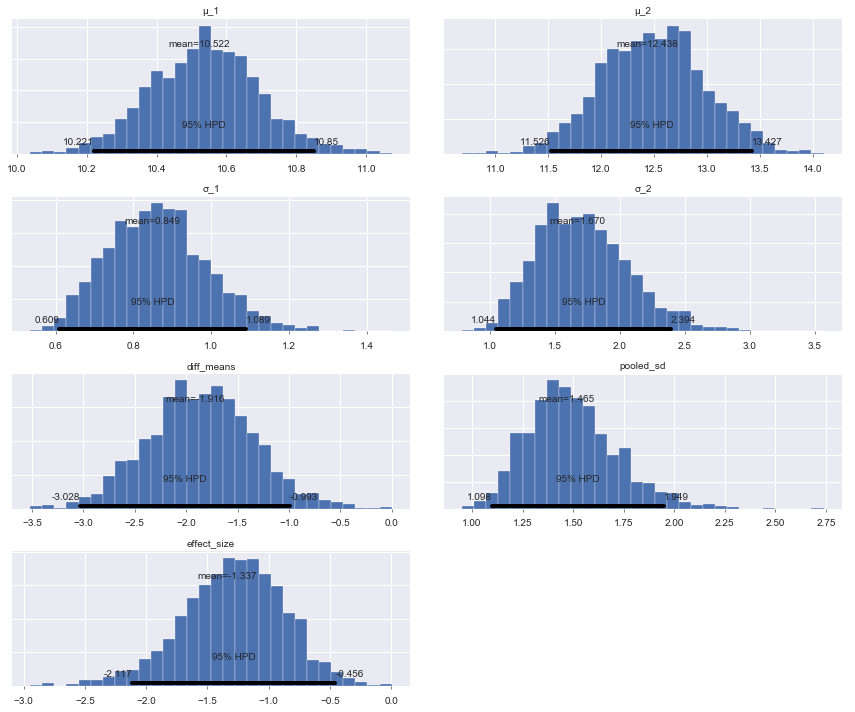

In [3]:
df_fortis = df_12.loc[df_12.species == 'fortis']
df_scandens = df_12.loc[df_12.species == 'scandens']

with pm.Model() as model:
    """
    The priors for each group.
    """
    μ_1 = pm.Normal('μ_1', mu=10, sd=5)
    σ_1 = pm.Lognormal('σ_1', 0, 10)
    μ_2 = pm.Normal('μ_2', mu=10, sd=5)
    σ_2 = pm.Lognormal('σ_2', 0, 10)
    # Gaussian Likelihoods
    y_1 = pm.Normal('y_1', mu=μ_1, sd=σ_1, observed=df_fortis.blength)
    y_2 = pm.Normal('y_2', mu=μ_2, sd=σ_2, observed=df_scandens.blength)
    # Calculate the effect size and its uncertainty.
    diff_means = pm.Deterministic('diff_means', μ_1 - μ_2)
    pooled_sd = pm.Deterministic('pooled_sd', 
                                 np.sqrt(np.power(σ_1, 2) + 
                                         np.power(σ_2, 2) / 2))
    effect_size = pm.Deterministic('effect_size', 
                                   diff_means / pooled_sd)
# bust it out & sample
with model:
    samples = pm.fit(random_seed=42).sample(2000)
pm.plot_posterior(samples);

In [4]:
# Construct the model
with pm.Model() as finch_model:
    # Prior on mean, variance
    μ = pm.Normal('μ', mu=10, sd=5)
    σ = pm.Lognormal('σ', 0, 10)
    # Gaussian Likelihood
    y = pm.Normal('y', mu=μ, sd=σ, observed=df_12.blength)

Average Loss = 491.78: 100%|██████████| 10000/10000 [00:07<00:00, 1423.28it/s]
Finished [100%]: Average Loss = 491.71


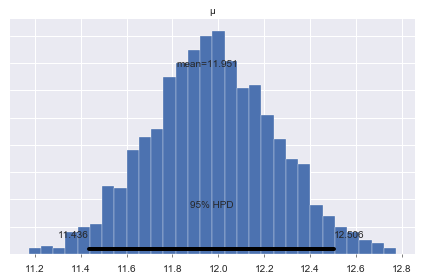

In [5]:
# Sample from that shit!
with finch_model:
    samples = pm.fit(random_seed=42).sample(1000)
 
# Plot posterior
pm.plot_posterior(samples, varnames=['μ']);

In [6]:
# click-through rates
p_a = 0.15
p_b = 0.16
N = 150
n_successes_a = np.random.binomial(N,p_a)
n_successes_b = np.random.binomial(N,p_b)

In [7]:
df_fortis = df_12.loc[df_12.species == 'fortis']
df_scandens = df_12.loc[df_12.species == 'scandens']


In [8]:
df_fortis = df_12.loc[df_12.species == 'fortis']
df_scandens = df_12.loc[df_12.species == 'scandens']

with pm.Model() as model:
    """
    The priors for each group.
    """
    μ_1 = pm.Normal('μ_1', mu=10, sd=5)
    σ_1 = pm.Lognormal('σ_1', 0, 10)
    μ_2 = pm.Normal('μ_2', mu=10, sd=5)
    σ_2 = pm.Lognormal('σ_2', 0, 10)
    #ν = pm.Exponential('nu', lam=1/29) + 1
    # Gaussian Likelihoods
    y_1 = pm.Normal('y_1', mu=μ_1, sd=σ_1, observed=df_fortis.blength)
    y_2 = pm.Normal('y_2', mu=μ_2, sd=σ_2, observed=df_scandens.blength)
    # Calculate the effect size and its uncertainty.
    diff_means = pm.Deterministic('diff_means', μ_1 - μ_2)

In [9]:
# bust it out & sample
with model:
    samples = pm.fit(random_seed=42).sample(2000)

Average Loss = 394.63: 100%|██████████| 10000/10000 [00:07<00:00, 1332.27it/s]
Finished [100%]: Average Loss = 394.31


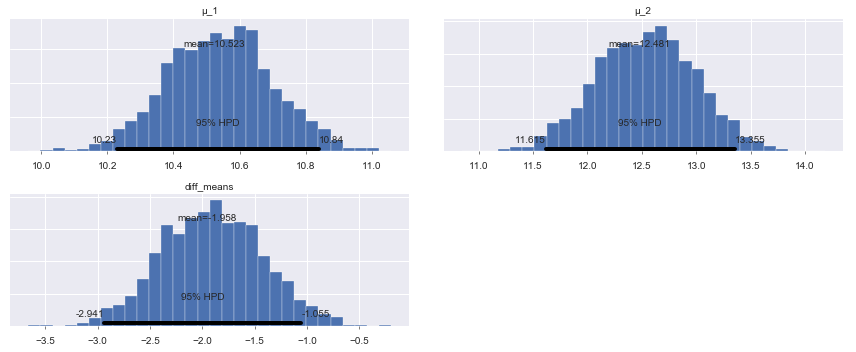

In [10]:
pm.plot_posterior(samples, varnames=['μ_1', 'μ_2', 'diff_means']);

## Click through rates notes

Bayesian A/B testing example using PyMC3:

In [11]:
# Gernerate click data
np.random.seed(42)

# click-through rates
p_a = 0.15
p_b = 0.20
N = 1000
successes_a = np.random.uniform(size=N) <= p_a
successes_b = np.random.uniform(size=N) <= p_b

Average Loss = 454.32: 100%|██████████| 10000/10000 [00:08<00:00, 1143.07it/s]
Finished [100%]: Average Loss = 454.31


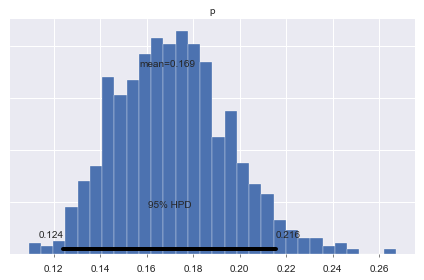

In [12]:
# Build model of p_a
with pm.Model() as Model:
    # Prior on p
    prob = pm.Uniform('p')
    # Binomial Likelihood
    y = pm.Bernoulli('y', p=prob, observed=successes_a)
    #y = pm.Bernoulli('y', )
with Model:
    samples = pm.fit(random_seed=42).sample(1000)
pm.plot_posterior(samples);

Average Loss = 963.66: 100%|██████████| 10000/10000 [00:08<00:00, 1120.60it/s]
Finished [100%]: Average Loss = 963.62


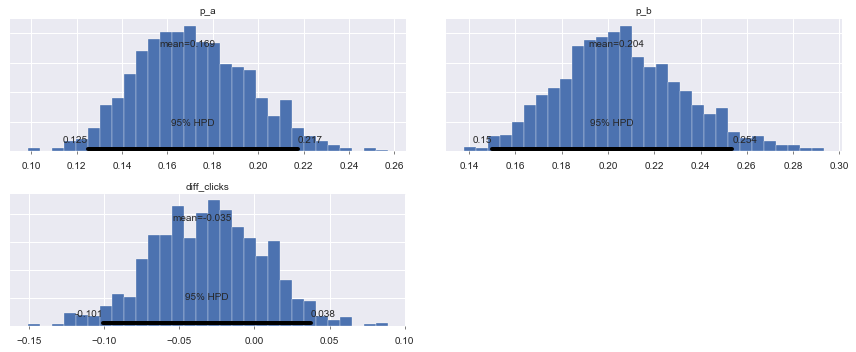

In [13]:
# Build A/B test model inc diff
with pm.Model() as Model:
    # Prior on p
    prob_a = pm.Uniform('p_a')
    prob_b = pm.Uniform('p_b')
    # Binomial Likelihood
    y_a = pm.Bernoulli('y_a', p=prob_a, observed=successes_a)
    y_b = pm.Bernoulli('y_b', p=prob_b, observed=successes_b)
    diff_clicks = pm.Deterministic('diff_clicks', prob_a-prob_b)
with Model:
    samples = pm.fit(random_seed=42).sample(1000)
pm.plot_posterior(samples);

Average Loss = 16.483: 100%|██████████| 10000/10000 [00:07<00:00, 1346.74it/s]
Finished [100%]: Average Loss = 16.45


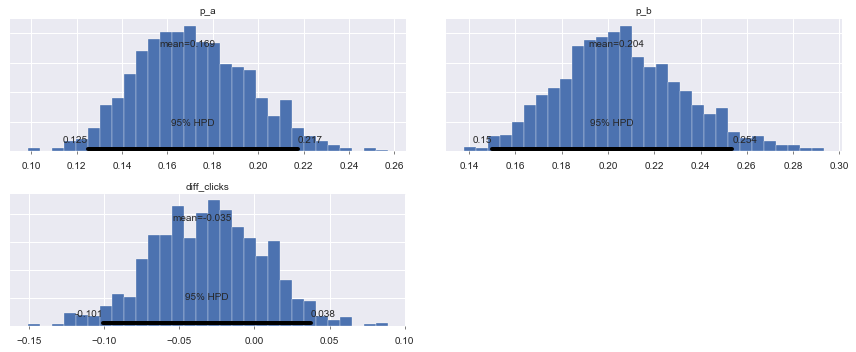

In [14]:
# Do the same as above but use Binomial, not Bernoulli

np.random.seed(42)

# click-through rates
p_a = 0.15
p_b = 0.20
N = 1000
successes_a = np.sum(np.random.uniform(size=N) <= p_a)
successes_b = np.sum(np.random.uniform(size=N) <= p_b)


with pm.Model() as Model:
    # Prior on p
    prob_a = pm.Uniform('p_a')
    prob_b = pm.Uniform('p_b')
    # Binomial Likelihood
    y_a = pm.Binomial('y_a', n=N, p=prob_a, observed=successes_a)
    y_b = pm.Binomial('y_b', n=N, p=prob_b, observed=successes_b)
    diff_clicks = pm.Deterministic('diff_clicks', prob_a-prob_b)

with Model:
    samples = pm.fit(random_seed=42).sample(1000)
pm.plot_posterior(samples);